In [2]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import cufflinks as cf
df = pd.read_csv("//Users//sjacob//stocks//QUALITYGROWTHSEPT2022.csv", index_col = False)

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df1 = df.sort_values(by='CV', ascending=True)
df1.reset_index(inplace = True)
cf.go_offline()
df1[["CV","Value at Risk"]].iplot(kind ='scatter', x ='CV', y ='Value at Risk', mode ='markers')

In [6]:
df1.iplot(kind="scatter",
              x="CV", y='Value at Risk',
              mode='markers',
              xTitle="CV", yTitle="Value at Risk",
              title="========CV-------VAR=========================", categories="Ticker",theme="solar")

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/sjacob/Library/Python/3.9/lib/python/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [7]:
df1.iplot(kind="scatter",
              x="Return%", y='CV',
              mode='markers',
              xTitle="Return", yTitle="CV",
              title="===Return-CV=====", categories="Ticker",theme="solar")

In [8]:
df1.iplot(kind="scatter",
              x="Return%", y='Value at Risk',
              mode='markers',
              xTitle="Return", yTitle="Value at Risk",
              title="===Return-VAR=====", categories="Ticker",theme="solar")

In [9]:
df1.iplot(kind="scatter",
              x="Return%", y='Volatility%',
              mode='markers',
              xTitle="Return", yTitle="Volatility",
              title="===Return-VOL=====", categories="Ticker",theme="solar")

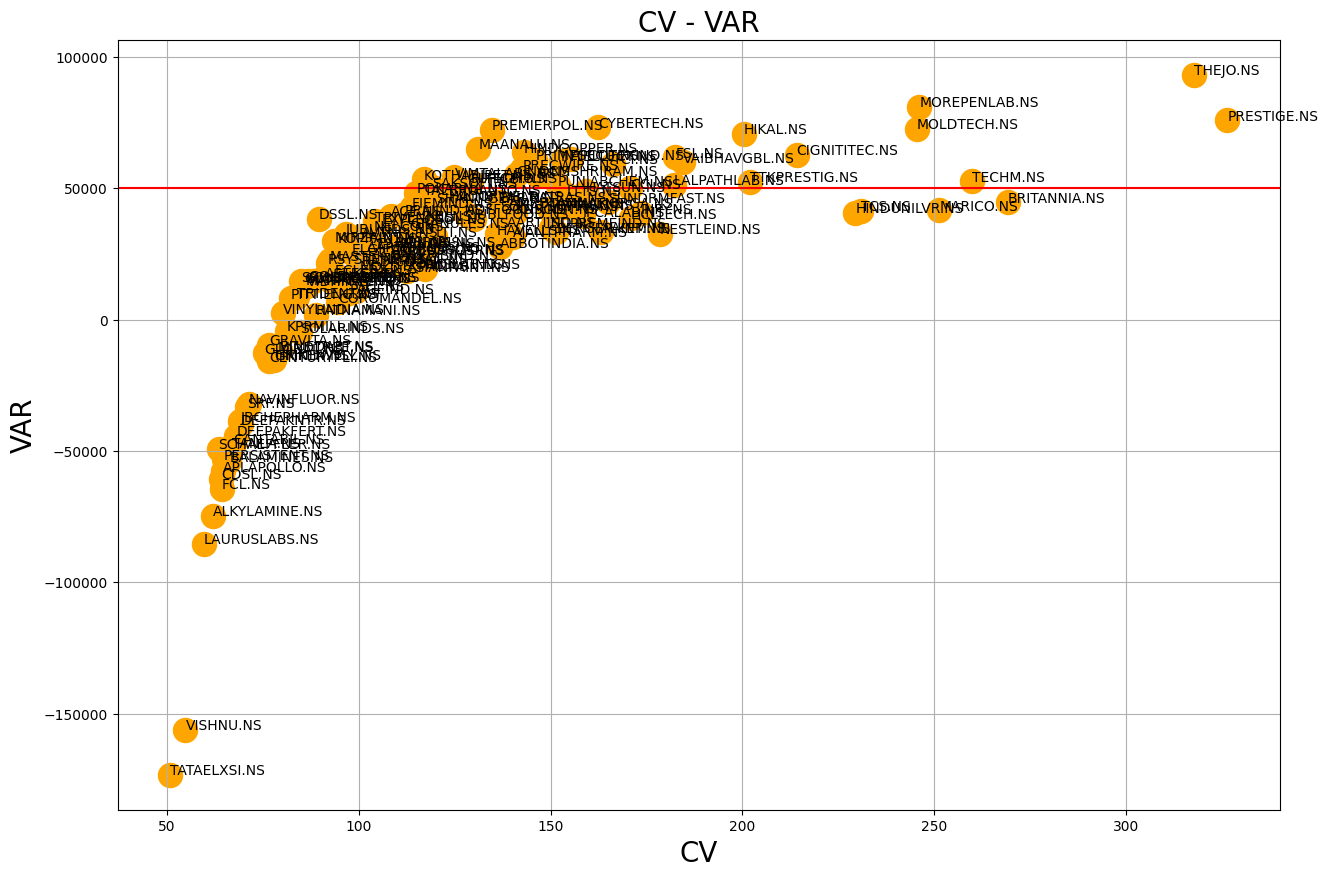

In [10]:

plt.figure(figsize=[15,10])
x= df1['CV']
y = df1['Value at Risk']
annotations = np.array(df1["Ticker"])
plt.grid(True)
plt.title('CV - VAR', fontsize=20, color='black')
plt.xlabel("CV",fontsize=20, color='black')
plt.ylabel("VAR", fontsize=20, color='black') 
plt.scatter(x, y,s=300,c='orange' )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
#plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()


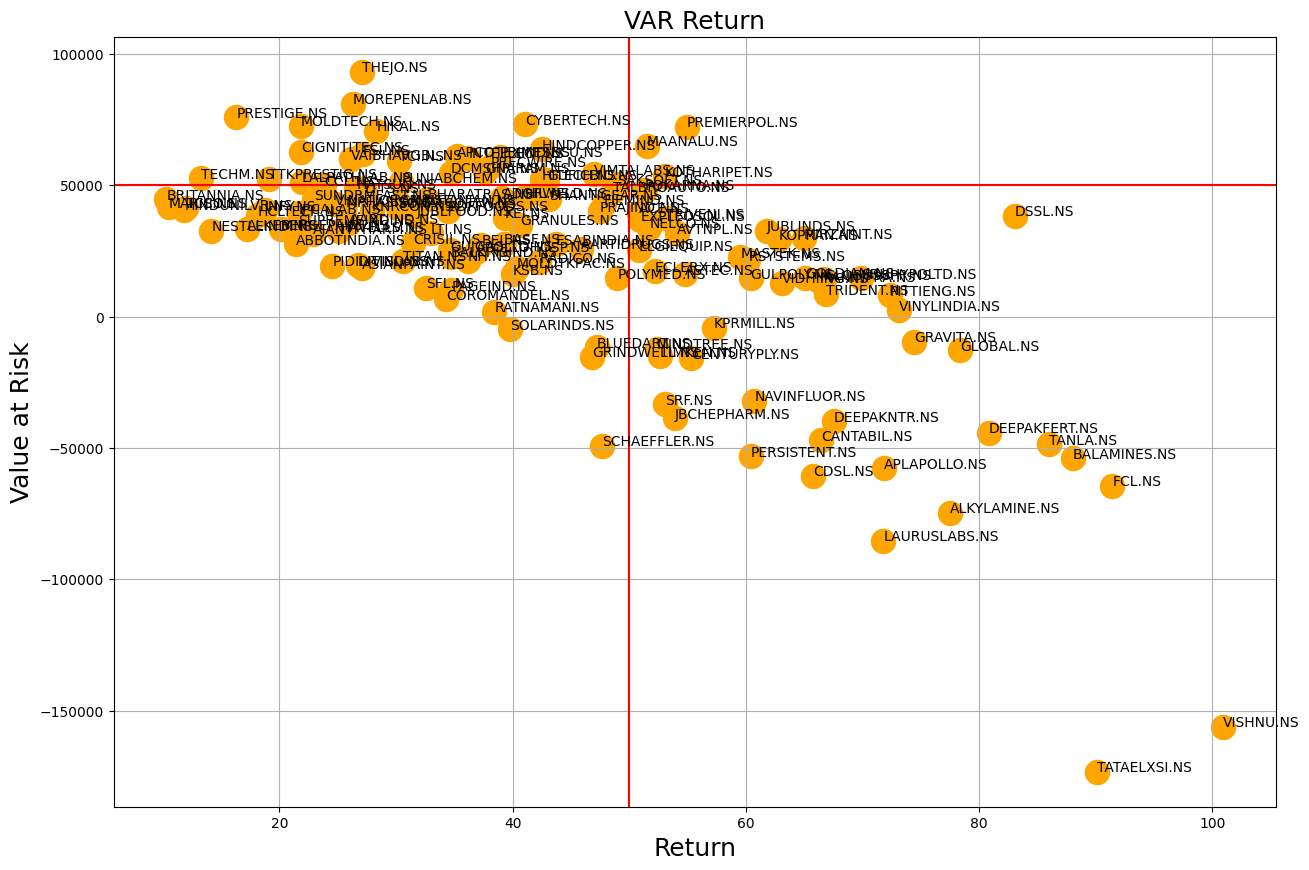

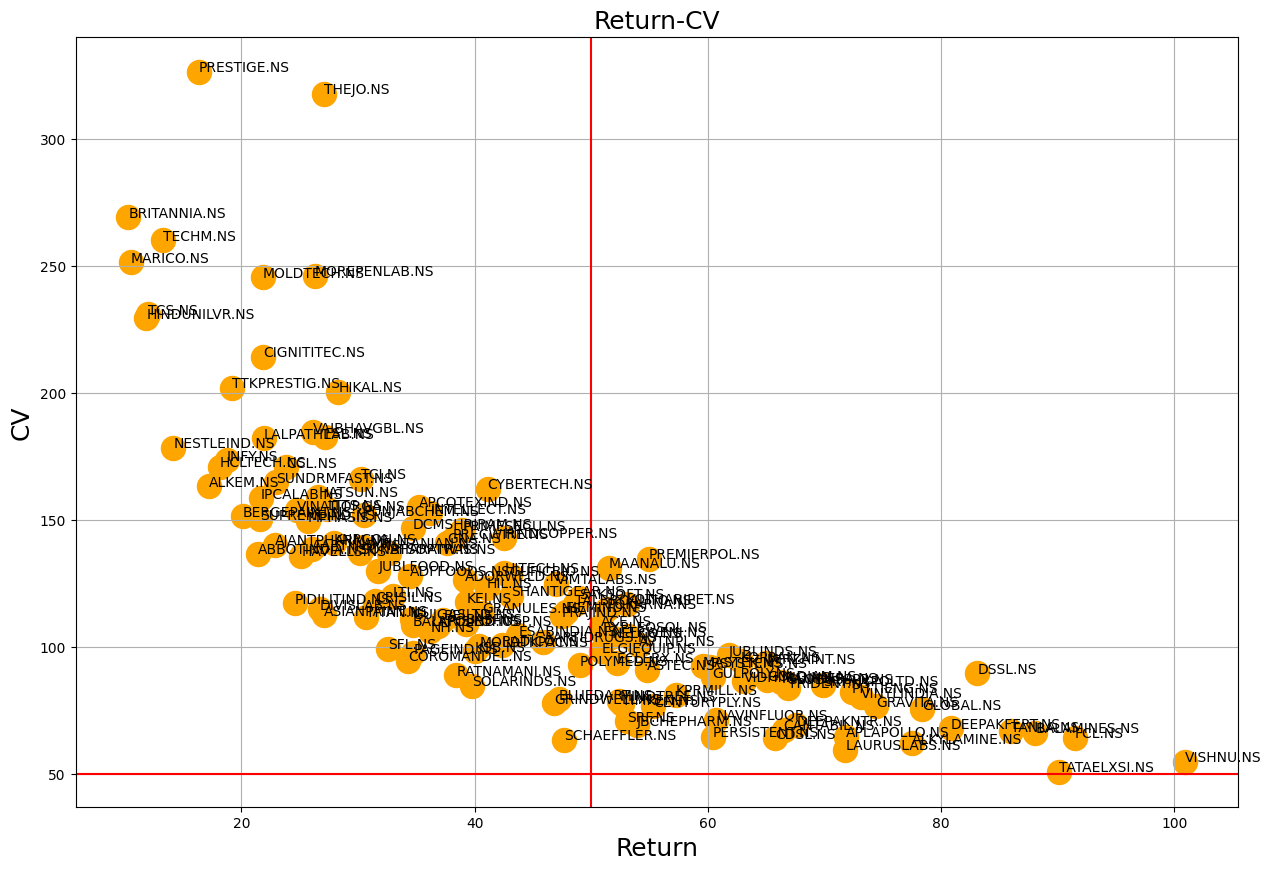

In [12]:
plt.figure(figsize=[15,10])
x= df1['Return%']
y = df1['Value at Risk']
annotations = df1["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=300,c='orange' )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()



plt.figure(figsize=[15,10])
x= df1['Return%']
y = df1['CV']
annotations = df1["Ticker"]
plt.grid(True)
plt.title('Return-CV', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("CV", fontsize=18, color='black') 
plt.scatter(x, y,s=300,c='orange' )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()


In [13]:
np.corrcoef(df['CV'], df['Value at Risk'])[0][1]

0.6875081887753894

In [14]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)
    
    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)
    
    return t_stat

In [15]:
t_stat_corr(df=df, y='Value at Risk', x='CV')

10.91846108910327

In [16]:
t_stat_corr(df=df, y='Return%', x='CV')

-13.782057321659053

In [17]:
t_stat_corr(df=df, y='Volatility%', x='Return%')

7.71500168506285

In [18]:
t_stat_corr(df=df, y='Volatility%', x='CV')

-0.9819571627650391

In [25]:
df[(df['CAGR']>20 ) & (df['Return%']>15) & (df['Volatility%']<50) &(df['Value at Risk']<50000)].head(30)

,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
2,TATAELXSI.NS,0.044831,0.054839,0.817499,45.819899,90.080096,50.865731,1.856837,145.857929,50.013769,-173224.410494
8,ALKYLAMINE.NS,0.048447,0.054839,0.883438,48.043365,77.521616,61.974153,1.509503,116.878818,45.536652,-74580.455809
12,APLAPOLLO.NS,0.052186,0.054839,0.951629,46.446696,71.830037,64.661941,1.438854,104.895456,49.323653,-57612.581109
13,LAURUSLABS.NS,0.038095,0.054839,0.694679,42.729020,71.792570,59.517329,1.563166,104.818807,37.484129,-85351.460425
15,DEEPAKNTR.NS,0.058959,0.054839,1.075142,46.820768,67.573498,69.288655,1.336448,96.368306,41.228339,-39872.368248
18,CANTABIL.NS,0.023080,0.054839,0.420863,44.795531,66.487820,67.374042,1.372633,94.250759,42.304383,-46948.315870
20,CDSL.NS,0.043336,0.054839,0.790240,42.133967,65.758745,64.073557,1.442037,92.841576,36.889472,-60630.339113
26,NAVINFLUOR.NS,0.040029,0.054839,0.729939,43.294431,60.723424,71.297743,1.287081,83.384280,30.015245,-32066.417891
27,PERSISTENT.NS,0.035673,0.054839,0.650516,39.112355,60.430373,64.723008,1.417209,82.848380,37.225042,-53155.649856
31,KPRMILL.NS,0.043436,0.054839,0.792062,46.500533,57.270609,81.194410,1.124086,77.168694,53.515540,-4262.118846
